<a href="https://colab.research.google.com/github/TanViCh0UhAn12/ML/blob/main/Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

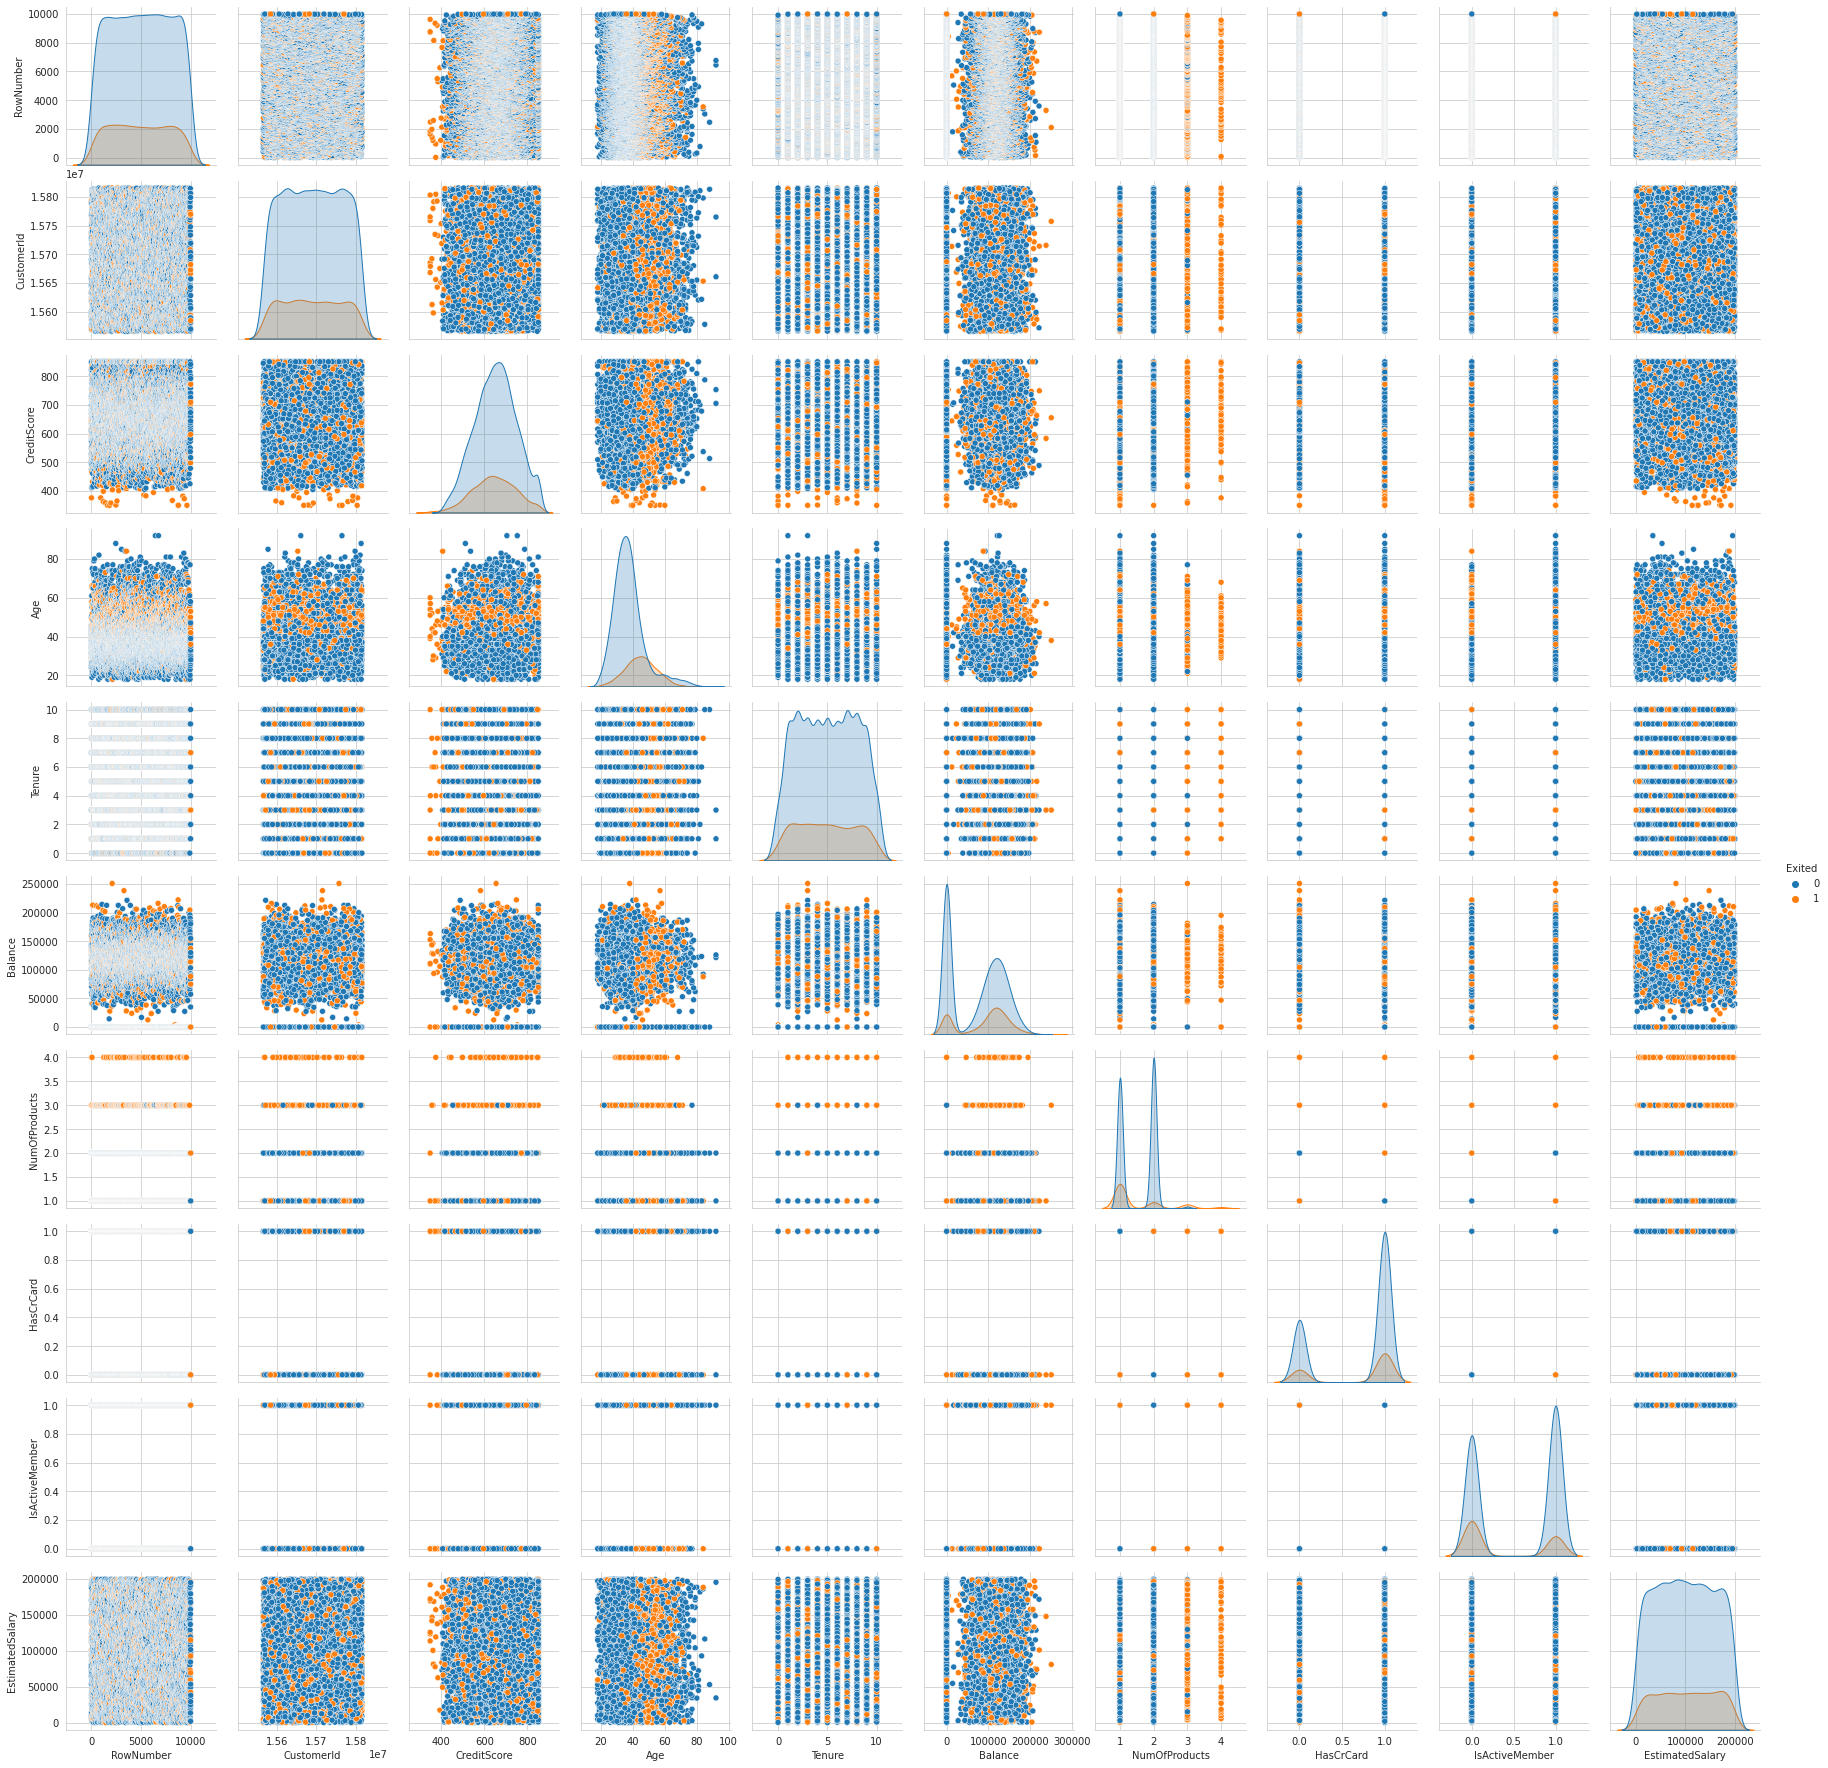

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/Churn_Modelling.csv")
df.head(7)
df.tail()

sns.set_style("whitegrid");
sns.pairplot(df, hue="Exited");
plt.show()





In [38]:
df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [41]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Exited'] = le.fit_transform(df['Exited'])
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
x=df.iloc[:,7:13]
y=df['Exited']
x.shape, y.shape

((10000, 6), (10000,))

In [45]:
x.head(3)

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2,0.00,1,1,1,101348.88
1,1,83807.86,1,0,1,112542.58
2,8,159660.80,3,1,0,113931.57


In [46]:
x.tail(3)

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9997,7,0.00,1,0,1,42085.58
9998,3,75075.31,2,1,0,92888.52
9999,4,130142.79,1,1,0,38190.78


In [47]:
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((7500, 6), (2500, 6), (7500,), (2500,))

In [49]:
x_train.head(3)

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2360,5,110624.99,1,1,0,89327.67
9280,6,72494.69,1,0,1,140041.78
4451,4,175111.11,1,1,1,74858.30


In [50]:
x_test.head(3)

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5242,0,81954.6,1,1,1,198798.44
4813,3,0.0,2,0,1,12465.51
2955,1,0.0,1,1,1,158750.53


In [51]:
y_train.head(3)

2360    0
9280    0
4451    0
Name: Exited, dtype: int64

In [52]:
y_test.head(3)

5242    1
4813    0
2955    0
Name: Exited, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [54]:
lr.fit(x_train, y_train)


LogisticRegression()

In [55]:
y_pred_lr=lr.predict(x_test)
y_pred_lr[:5], y_test.values[:5]

(array([0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0]))

In [56]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7957333333333333
0.798


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_pred_lr, y_test))
print(classification_report(y_pred_lr,y_test))
print(f'model_score : {lr.score(x_test, y_test)}')
print(f'accuracy_score : {accuracy_score(y_pred_lr, y_test)}')

[[1995  505]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2500
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2500
   macro avg       0.50      0.40      0.44      2500
weighted avg       1.00      0.80      0.89      2500

model_score : 0.798
accuracy_score : 0.798


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


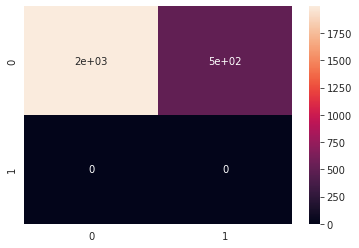

In [58]:
cm = confusion_matrix(y_pred_lr, y_test)
sns.heatmap(cm, annot=True)
plt.show()